In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from zipfile import ZipFile
import numpy as np
import ast
pd.set_option('display.max_columns', 30)

#os.system('kaggle competitions download -c "tmdb-box-office-prediction"')

#with ZipFile('tmdb-box-office-prediction.zip', 'r') as zipObj:
#   # Extract all the contents of zip file in current directory
#   zipObj.extractall()

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

train_data.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


# First thoughts
After looking at the data content, we can imidiately see that it needs some work.
- Some columns are obviously not useful, like imdb_id
- There are many NaN and empty columns
- There is a lot of text
- Some columns contain objects or arrays with more content

## We take a look at the datasets

In [2]:
print(train_data.shape)
print(test_data.shape)

(3000, 23)
(4398, 22)


### Let's check out the top performers

In [3]:
train_sorted_rev = train_data.sort_values(by=['revenue'], ascending=False)
train_sorted_rev.head(20)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
1126,1127,"[{'id': 86311, 'name': 'The Avengers Collectio...",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",http://marvel.com/avengers_movie/,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,89.887648,/cezWGskPY5x7GaglTTRN4Fugfb8.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",4/25/12,143.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Some assembly required.,The Avengers,"[{'id': 242, 'name': 'new york'}, {'id': 5539,...","[{'cast_id': 46, 'character': 'Tony Stark / Ir...","[{'credit_id': '52fe4495c3a368484e02b1cf', 'de...",1519557910
1761,1762,"[{'id': 9485, 'name': 'The Fast and the Furiou...",190000000,"[{'id': 28, 'name': 'Action'}]",http://www.furious7.com/,tt2820852,en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,27.275687,/dCgm7efXDmiABSdWDHBDBx2jwmn.jpg,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",4/1/15,137.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Vengeance Hits Home,Furious 7,"[{'id': 830, 'name': 'car race'}, {'id': 3428,...","[{'cast_id': 17, 'character': 'Dominic Toretto...","[{'credit_id': '52fe4cc8c3a36847f823e681', 'de...",1506249360
2770,2771,"[{'id': 86311, 'name': 'The Avengers Collectio...",280000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://marvel.com/movies/movie/193/avengers_ag...,tt2395427,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,37.379420,/t90Y3G8UGQp0f0DrP60wRu9gfrH.jpg,"[{'name': 'Marvel Studios', 'id': 420}, {'name...","[{'iso_3166_1': 'US', 'name': 'United States o...",4/22/15,141.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A New Age Has Come.,Avengers: Age of Ultron,"[{'id': 8828, 'name': 'marvel comic'}, {'id': ...","[{'cast_id': 76, 'character': 'Tony Stark / Ir...","[{'credit_id': '55d5f7d4c3a3683e7e0016eb', 'de...",1405403694
684,685,NaN,160000000,"[{'id': 10751, 'name': 'Family'}, {'id': 14, '...",http://movies.disney.com/beauty-and-the-beast-...,tt2771200,en,Beauty and the Beast,A live-action adaptation of Disney's version o...,287.253654,/tWqifoYuwLETmmasnGHO7xBjEtt.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",3/16/17,129.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Be our guest.,Beauty and the Beast,"[{'id': 254, 'name': 'france'}, {'id': 2343, '...","[{'cast_id': 174, 'character': 'Belle', 'credi...","[{'credit_id': '551879bec3a3681f840004eb', 'de...",1262886337
2322,2323,"[{'id': 8650, 'name': 'Transformers Collection...",195000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",http://www.transformersmovie.com/,tt1399103,en,Transformers: Dark of the Moon,Sam Witwicky takes his first tenuous steps int...,4.503505,/sZY3ls18QTY0pFBJn2vl2MmauTQ.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",6/28/11,154.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The invasion we always feared. An enemy we nev...,Transformers: Dark of the Moon,"[{'id': 305, 'name': 'moon'}, {'id': 1612, 'na...","[{'cast_id': 3, 'character': 'Sam Witwicky', '...","[{'credit_id': '537f0b740e0a2624b40044d0', 'de...",1123746996
906,907,"[{'id': 263, 'name': 'The Dark Knight Collecti...",250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,tt1345836,en,The Dark Knight Rises,Following the death of District Attorney Harve...,20.582580,/dEYnvnUfXrqvqeRSqvIEtmzhoA8.jpg,"[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",7/16/12,165.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Legend 

## Take a look at some of the potentially important columns

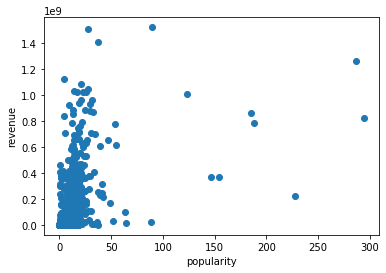

In [4]:
plt.scatter(train_data['popularity'], train_data['revenue'])
plt.xlabel('popularity')
plt.ylabel('revenue')
plt.show()

We can see here that most movies that has a high popularity also seem to have a pretty high revenue, but there are also many movies that do not have a high popularity with high revenues.

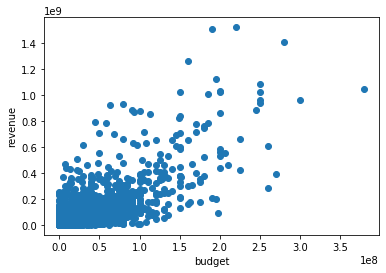

In [5]:
plt.scatter(train_data['budget'], train_data['revenue'])
plt.xlabel('budget')
plt.ylabel('revenue')
plt.show()

There seems to be a more stronger correlation between budget and revenue, than popularity and revevue

### Look for other correlations

In [6]:
corr_matrix = train_data.corr()

In [7]:
corr_matrix["revenue"].sort_values(ascending=False)

revenue       1.000000
budget        0.752965
popularity    0.461460
runtime       0.216380
id            0.000610
Name: revenue, dtype: float64

This sort of confirms our observation that budget has a strong correlation to revenue. There are many of the columns that are left out in this situation though. All the columns containing text or objects are ignored, and some of them might be very important.

# Clean the data

Some columns are pretty obviously useless, so we will drop these. Other columns can be useful of converted into a binary format. Let's do this.

### Fixing the release dates
We start of by splitting up the column that contains the release date into three different columns that we can use later. One for release year, one for release month and the last one for the release day

In [8]:
def release_data_unpacking(data):
    data[['release_month','release_day','release_year']]=data['release_date'].str.split('/',expand=True).replace(np.nan, 0).astype(int)
    data['release_year'] = data['release_year']
    data.loc[ (data['release_year'] <= 18) & (data['release_year'] < 100), "release_year"] += 2000
    data.loc[ (data['release_year'] > 18)  & (data['release_year'] < 100), "release_year"] += 1900
    
    return data

In [9]:
train_data = release_data_unpacking(train_data)
test_data = release_data_unpacking(test_data)
train_data

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,release_month,release_day,release_year
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2,20,2015
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,8,6,2004
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,10,10,2014
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,3,9,2012
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,2,5,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0109403,en,Chasers,Military men Rock Reilly and Eddie Devane are ...,9.853270,/j8Q7pQ27hvH54wpxJzIuQgQCdro.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",4/22/94,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was supposed to be a routine prisoner trans...,Chasers,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687,4,22,1994
2996,2997,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,tt2364975,sv,Vi är bäst!,Three girls in 1980s Sto

### Spoken languages
To simplify things a bit here, it might be easiest to make a new binary column that says if the spoken language is english or not. And for spoken languages it might be smart to simplify them down to how many there are. There might be a correlation between how many languages a film is availible in, and how much revenue it generates.

In [10]:
def unpack_languages(data):
    data['is_english'] = data['original_language'].apply(lambda x: 1 if x == 'en' else 0)
    data['spoken_languages'] = data['spoken_languages'].apply(lambda x: list(map(lambda d: list(d.values())[0], ast.literal_eval(x)) if isinstance(x, str) else []))
    data['num_languages'] = data['spoken_languages'].apply(lambda x: len(x))
    
    return data

In [11]:
train_data = unpack_languages(train_data)
test_data = unpack_languages(test_data)
train_data

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,release_month,release_day,release_year,is_english,num_languages
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,[en],Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2,20,2015,1,1
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,[en],Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,8,6,2004,1,1
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,[en],Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,10,10,2014,1,1
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[en, hi]",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,3,9,2012,0,2
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,[ko],Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,2,5,2009,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0109403,en,Chasers,Military men Rock Reilly and Eddie Devane are ...,9.853270,/j8Q7pQ27hvH54wpxJzIuQgQCdro.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",4/22/94,102.0,[en],Released,It was supposed to be a routine prisoner trans...,Chasers,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687,4,22,1994,1,1
2996,2997,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,tt2364975,sv,Vi är bäst!,Three girls in 1980s Stockholm decide to form ...,3.727996,/sS01LSy6KDrCZAhtkO18UdnWFT1.jpg,"[{'name': 'Memfis Film', 'id': 321}, {'name': ...","[{'iso_3166_1': 'DK', 'name': 'Denmark'}, {'is...",3/

### Convert to binary columns
Some of these columns might be easier to deal with in a binary format, so we convert them.

In [12]:
def make_bin_cols(data):
    data['has_homepage'] = np.where(data['homepage'].isna(), 0, 1)
    data['has_collection'] = np.where(data['belongs_to_collection'].isna(), 0, 1)
    data['has_tagline'] = np.where(data['tagline'].isna(), 0, 1)
    data['isReleased'] = np.where(data['status'] != 'Released', 0, 1)

    return data

In [13]:
test_data = make_bin_cols(test_data)
train_data = make_bin_cols(train_data)
train_data

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,...,tagline,title,Keywords,cast,crew,revenue,release_month,release_day,release_year,is_english,num_languages,has_homepage,has_collection,has_tagline,isReleased
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,...,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2,20,2015,1,1,0,1,1,1
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,...,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,8,6,2004,1,1,0,1,1,1
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,...,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,10,10,2014,1,1,1,0,1,1
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,...,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,3,9,2012,0,2,1,0,0,1
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,...,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,2,5,2009,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0109403,en,Chasers,Military men Rock Reilly and Eddie Devane are ...,9.853270,/j8Q7pQ27hvH54wpxJzIuQgQCdro.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",4/22/94,102.0,...,It was supposed to be a routine prisoner trans...,Chasers,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687,4,22,1994,1,1,0,0,1,1
2996,2997,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,tt2364975,sv,Vi är bäst!,Three girls in 1980s Stockholm decide to form ...,3.727996,/sS01LSy6KDrCZAhtkO18UdnWFT1.jpg,"[{'name': 'Memfis Film', 'id': 321}, {'name': ...","[{'iso_3166_1': 'DK', 'name'

### Dropping columns
We drop columns that are not needed anymore, and some that do not seem beneficial to use

In [14]:
def drop_cols(data):
    data = data.drop(['tagline', 'crew', 'cast', 'title', 'status', 'homepage', 'belongs_to_collection', 'genres', 'imdb_id', 'original_language', 'overview', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'original_title', 'spoken_languages', 'Keywords'], axis=1)
    
    return data

In [15]:
train_data = drop_cols(train_data)
test_data = drop_cols(test_data)
train_data

,id,budget,popularity,runtime,revenue,release_month,release_day,release_year,is_english,num_languages,has_homepage,has_collection,has_tagline,isReleased
0,1,14000000,6.575393,93.0,12314651,2,20,2015,1,1,0,1,1,1
1,2,40000000,8.248895,113.0,95149435,8,6,2004,1,1,0,1,1,1
2,3,3300000,64.299990,105.0,13092000,10,10,2014,1,1,1,0,1,1
3,4,1200000,3.174936,122.0,16000000,3,9,2012,0,2,1,0,0,1
4,5,0,1.148070,118.0,3923970,2,5,2009,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,0,9.853270,102.0,1596687,4,22,1994,1,1,0,0,1,1
2996,2997,0,3.727996,102.0,180590,3,28,2013,0,1,0,0,0,1
2997,2998,65000000,14.482345,120.0,89456761,10,11,1996,1,1,0,0,1,1
2998,2999,42000000,15.725542,90.0,171963386,1,16,2004,1,1,1,0,1,1


### Remove NaN values
We need to make sure there are no NaN values in the data

In [16]:
train_data.isnull().sum()
    

id                0
budget            0
popularity        0
runtime           2
revenue           0
release_month     0
release_day       0
release_year      0
is_english        0
num_languages     0
has_homepage      0
has_collection    0
has_tagline       0
isReleased        0
dtype: int64

In [17]:
test_data.isnull().sum()

id                0
budget            0
popularity        0
runtime           4
release_month     0
release_day       0
release_year      0
is_english        0
num_languages     0
has_homepage      0
has_collection    0
has_tagline       0
isReleased        0
dtype: int64

We can see that there are som NaN values in the runtime column, these will be replaced by average runtime

In [18]:
def fix_runtime(data):
    average_runtime = data['runtime'].mean()
    data['runtime'].fillna(average_runtime, inplace=True)
    
    return data

In [19]:
test_data = fix_runtime(test_data)
train_data = fix_runtime(train_data)
test_data.isnull().sum()

id                0
budget            0
popularity        0
runtime           0
release_month     0
release_day       0
release_year      0
is_english        0
num_languages     0
has_homepage      0
has_collection    0
has_tagline       0
isReleased        0
dtype: int64

In [20]:
train_data['runtime']

0        93.0
1       113.0
2       105.0
3       122.0
4       118.0
        ...  
2995    102.0
2996    102.0
2997    120.0
2998     90.0
2999    106.0
Name: runtime, Length: 3000, dtype: float64

# Linear Regression
First let's try out some linear regression, come have a look!

In [21]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
train_data_no_rev = train_data.drop('revenue', axis=1)
lin_reg.fit(train_data_no_rev, train_data['revenue'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Let's try out our new model on some data

In [22]:
some_data = train_data_no_rev.iloc[:5]
some_labels = train_data['revenue'].iloc[:5]
print("Predictions:\t", lin_reg.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [ 7.31253556e+07  1.44884495e+08  1.55169886e+08  1.16282923e+07
 -1.70485691e+07]
Labels:		 [12314651, 95149435, 13092000, 16000000, 3923970]


It does not seem to perform very well. Let's get a measure of it's performance using the Linear Mean Squared Error function

In [23]:
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
box_predictions = lin_reg.predict(train_data_no_rev)
lin_mse = mean_squared_error(train_data['revenue'], box_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

81661388.16972412

# Cross validation scoring
To improve the training we will introduce cross validation scoring. This will allow the creating of new and random validation sets that will used in the fitting of a new model.

# Random Forest

In [57]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=30, high=31),
        'max_features': randint(low=1, high=13),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(train_data_no_rev, train_data['revenue'])

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [58]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

80916709.84361008 {'max_features': 7, 'n_estimators': 30}
79847625.00217107 {'max_features': 4, 'n_estimators': 30}
83895009.35973343 {'max_features': 11, 'n_estimators': 30}
83127153.31067093 {'max_features': 8, 'n_estimators': 30}
79383465.67599173 {'max_features': 5, 'n_estimators': 30}
80916709.84361008 {'max_features': 7, 'n_estimators': 30}
84082392.43819387 {'max_features': 10, 'n_estimators': 30}
79717329.64274526 {'max_features': 3, 'n_estimators': 30}
80916709.84361008 {'max_features': 7, 'n_estimators': 30}
83895009.35973343 {'max_features': 11, 'n_estimators': 30}
83895009.35973343 {'max_features': 11, 'n_estimators': 30}
83127153.31067093 {'max_features': 8, 'n_estimators': 30}
79383465.67599173 {'max_features': 5, 'n_estimators': 30}
79847625.00217107 {'max_features': 4, 'n_estimators': 30}
83127153.31067093 {'max_features': 8, 'n_estimators': 30}
83127153.31067093 {'max_features': 8, 'n_estimators': 30}
79717329.64274526 {'max_features': 3, 'n_estimators': 30}
81371996.7

According to this RandomGridSearch, out best estimator is

In [59]:
rnd_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=5, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

we give these settings a run, but with lots of estimators, since this seems to provide better results.

In [60]:
final_model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=5, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [61]:
final_model.fit(train_data_no_rev, train_data['revenue'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=5, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [62]:
final_predictions = final_model.predict(train_data_no_rev)
final_mse = mean_squared_log_error(train_data['revenue'], final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

2.1882534531259465

# xcat and gboost
we will now try some other models

### we need to create a new test set for this one


In [30]:
import xgboost as xgb
import catboost as catb
from sklearn.model_selection import train_test_split

X = train_data.drop(['revenue'], axis = 1)
y = train_data.revenue.apply(np.log1p)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12, shuffle=True)



In [31]:
params = {'objective': 'reg:linear', 
          'eta': 0.01, 
          'max_depth': 6, 
          'min_child_weight': 3,
          'subsample': 0.8,
          'colsample_bytree': 0.8,
          'colsample_bylevel': 0.50, 
          'gamma': 1.45, 
          'eval_metric': 'rmse', 
          'seed': 12, 
          'silent': True    
}

In [32]:
xgb_data = [(xgb.DMatrix(X_train, y_train), 'train'), (xgb.DMatrix(X_test, y_test), 'valid')]

C:\Users\mikkel.birkeland\AppData\Local\Continuum\anaconda3\envs\dat158\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [33]:
print('Starting training...')
# train
xgb_model = xgb.train(params, 
                  xgb.DMatrix(X_train, y_train),
                  5000,  
                  xgb_data, 
                  verbose_eval=200,
                  early_stopping_rounds=200)

Starting training...
[0]	train-rmse:15.672	valid-rmse:15.3507
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 200 rounds.
[200]	train-rmse:2.84435	valid-rmse:2.94482
[400]	train-rmse:1.67008	valid-rmse:2.15287
[600]	train-rmse:1.48972	valid-rmse:2.12997
[800]	train-rmse:1.35761	valid-rmse:2.12515
[1000]	train-rmse:1.24189	valid-rmse:2.12655
Stopping. Best iteration:
[861]	train-rmse:1.32131	valid-rmse:2.12325



In [34]:
xgb_model_full = xgb.XGBRegressor(objective  = 'reg:linear', 
          eta = 0.01, 
          max_depth = 6,
          min_child_weight = 3,
          subsample = 0.8, 
          colsample_bytree = 0.8,
          colsample_bylevel = 0.50, 
          gamma = 1.45, 
          eval_metric = 'rmse',
          seed = 12, n_estimators = 2000)

In [35]:
xgb_model_full.fit (X.values, y)

[12:26:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
             colsample_bynode=1, colsample_bytree=0.8, eta=0.01,
             eval_metric='rmse', gamma=1.45, importance_type='gain',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=3, missing=None, n_estimators=2000, n_jobs=1,
             nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=12, silent=None,
             subsample=0.8, verbosity=1)

In [36]:
catmodel = catb.CatBoostRegressor(iterations=10000, 
                                 learning_rate=0.01, 
                                 depth=5, 
                                 eval_metric='RMSE',
                                 colsample_bylevel=0.7,
                                 bagging_temperature = 0.2,
                                 metric_period = None,
                                 early_stopping_rounds=200,
                                 random_seed=12)

In [38]:
import time
ti=time.time()
catmodel.fit(X, y, 
             eval_set=(X_train, y_train), 
             verbose=500, 
             use_best_model=True)

print("Number of minutes of training of model_cal = {:.2f}".format((time.time()-ti)/60))

cat_pred_train=catmodel.predict(X)
cat_pred_train[cat_pred_train<0]=0

0:	learn: 3.0489549	test: 3.0433961	best: 3.0433961 (0)	total: 58.5ms	remaining: 9m 45s
500:	learn: 2.0281417	test: 2.0111357	best: 2.0111357 (500)	total: 1.38s	remaining: 26.1s
1000:	learn: 1.8788931	test: 1.8532362	best: 1.8532362 (1000)	total: 2.67s	remaining: 24s
1500:	learn: 1.7621661	test: 1.7343715	best: 1.7343715 (1500)	total: 3.98s	remaining: 22.5s
2000:	learn: 1.6732412	test: 1.6475619	best: 1.6475619 (2000)	total: 5.29s	remaining: 21.1s
2500:	learn: 1.5994775	test: 1.5754394	best: 1.5754394 (2500)	total: 6.6s	remaining: 19.8s
3000:	learn: 1.5343973	test: 1.5125189	best: 1.5125189 (3000)	total: 7.86s	remaining: 18.3s
3500:	learn: 1.4774801	test: 1.4575156	best: 1.4575156 (3500)	total: 9.14s	remaining: 17s
4000:	learn: 1.4277263	test: 1.4085580	best: 1.4085580 (4000)	total: 10.5s	remaining: 15.7s
4500:	learn: 1.3816832	test: 1.3639562	best: 1.3639562 (4500)	total: 11.8s	remaining: 14.5s
5000:	learn: 1.3394165	test: 1.3225451	best: 1.3225451 (5000)	total: 13.2s	remaining: 13.2s

In [39]:
final_predictions = catmodel.predict(train_data_no_rev)
final_mse_xcat = mean_squared_log_error(train_data['revenue'], final_predictions)
final_rmse_xcat = np.sqrt(final_mse_xcat)
final_rmse_xcat

13.45886466776565

In [41]:
X_test = test_data
xgb_pred = np.expm1(xgb_model.predict(xgb.DMatrix(X_test), ntree_limit=xgb_model.best_ntree_limit))
pd.DataFrame({'id': test_data.id, 'revenue': xgb_pred}).to_csv('xgbsubmission.csv', index=False)

In [42]:
xgb_pred[0]

1502582.1

In [43]:
xgb_pred_f = np.expm1(xgb_model_full.predict(X_test.values))
pd.DataFrame({'id': test_data.id, 'revenue': xgb_pred_f}).to_csv('xgbfullsubmission.csv', index=False)
xgb_pred_f[0]

2847096.8

In [45]:
X_test = test_data
catb_pred = np.expm1(catmodel.predict(X_test.values))
pd.DataFrame({'id': test_data.id, 'revenue': catb_pred}).to_csv('catbsubmission.csv', index=False)

In [46]:
catb_pred[0]

2207308.5284615085

In [55]:
ens_pred = 0.2*xgb_pred_f + 0.8*catb_pred
pd.DataFrame({'id': test_data.id, 'revenue': ens_pred}).to_csv('enssubmission.csv', index=False)

In [56]:
ens_pred[0]

2335266.197769207

In [50]:
pd.DataFrame({'id': test_data.id, 'revenue': ens_pred}).head()

,id,revenue
0,3001,2.399245e+06
1,3002,2.345584e+06
2,3003,3.008472e+06
3,3004,1.649484e+07
4,3005,7.223227e+05
